<center>
<h1> Fundamentos de Machine Learning para Ciencia de Datos </h1>
</center>

### Metodología de Trabajo de John Rollins

John Rollins propuso una metodología estructurada para el trabajo en ciencia de datos, que consta de varias etapas clave para abordar de manera efectiva los problemas de análisis de datos y modelado predictivo.

1. **Definir el Problema**: Comprender claramente el problema o la pregunta de investigación que se abordará.
2. **Recopilación de Datos**: Recolectar los datos relevantes necesarios para el análisis.
3. **Exploración de Datos**: Realizar un análisis exploratorio de los datos para comprender mejor su naturaleza y relaciones.
4. **Preprocesamiento de Datos**: Limpiar, transformar y preparar los datos para el modelado.
5. **Modelado**: Desarrollar modelos predictivos utilizando técnicas adecuadas según el problema.
6. **Evaluación**: Evaluar el rendimiento y la validez de los modelos construidos.
7. **Despliegue**: Implementar soluciones basadas en los resultados del análisis y modelado.

A continuación, se presenta un esquema visual de la metodología propuesta por John Rollins:

![Metodología de Trabajo de John Rollins](https://www.researchgate.net/publication/340292606/figure/fig14/AS:963472573595670@1606721170929/Foundational-methodology-for-data-science-11.png)

<center>
<h1>  Técnicas de Aprendizaje Supervisado </h1>

<center>
<h2> Modelos de Regresión </h2>

### 1. Recolección de Datos

En esta sección, se obtienen un conjunto de datos sobre el consumo de combustible y las emisiones de CO2 de diversos vehículos desde una URL utilizando la librería Pandas. Los datos se almacenan en un DataFrame para su posterior análisis y modelado.

In [1]:
import pandas as pd

# URL del conjunto de datos
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

# Cargar datos desde la URL
df = pd.read_csv(url)

### 2. Comprensión de los Datos
Se realizan análisis exploratorios para comprender la estructura de los datos. Esto incluye visualizar las primeras y últimas filas del DataFrame, verificar los tipos de datos y generar estadísticas descriptivas básicas.

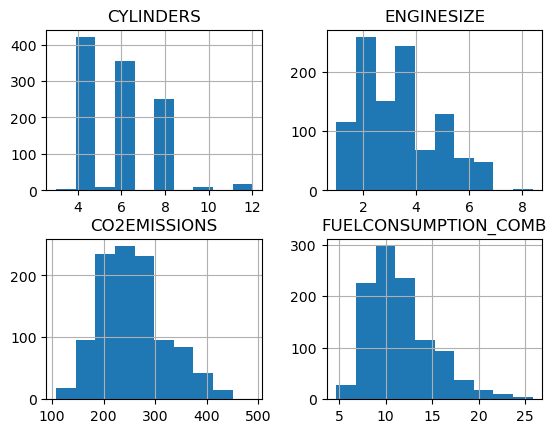

In [2]:
# Mostrar las primeras filas
df.head()

# Importar la librería matplotlib para visualización
import matplotlib.pyplot as plt
%matplotlib inline

# Crear un DataFrame con las columnas de interés 
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

# Mostrar los gráficos
viz.hist()
plt.show()

### 4. Modelado
En la fase de modelado, se aplican técnicas de regresión para predecir las emisiones de CO2 de los automóviles en base a diferentes características. A continuación se presentan algunos modelos utilizados:

####  4.1. Regresión Lineal (LR)
Este tipo de regresión es conocida por su ecuación:

$$
Yhat = a + b  X
$$


Coeficient: [[39.64771341]]
Intercept: [125.55268333]
The MSE for your model is:  1092.2931593041808
R-squared (R²) - Test data: 0.7245385677455163


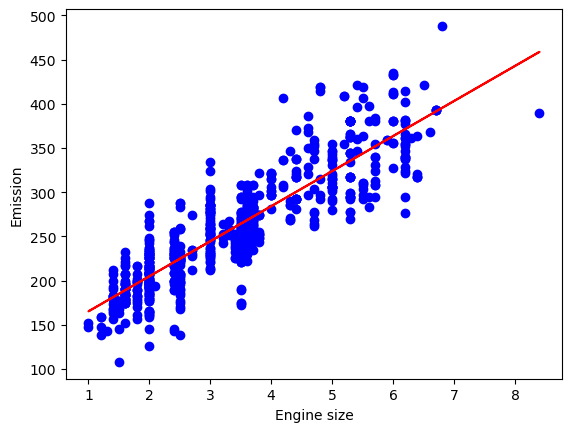

In [3]:
# Regresión Lineal

from sklearn.linear_model import LinearRegression
import numpy as np

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X = df['ENGINESIZE'] # Variable Independiente
Y = df['CO2EMISSIONS'] # Variable Dependiente 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state = 0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
X_train_reshaped = X_train.values.reshape(-1, 1)
Y_train_reshaped = Y_train.values.reshape(-1,1)
model.fit(X_train_reshaped,Y_train_reshaped)

# Obtener los coeficientes del modelo
print(f'Coeficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Crear predicciones
X_test_reshaped = X_test.values.reshape(-1, 1)
Y_pred = model.predict(X_test_reshaped)

# Mostrar Resultados
plt.scatter(X_train, Y_train,  color='blue')
plt.plot(X_train, model.coef_[0]*X_train + model.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Evaluar el desempeño del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calcular el MSE
mse_slr = mean_squared_error(Y_test,Y_pred)
print('The MSE for your model is: ', mse_slr)

# R-Squared
r2_test = r2_score(Y_test, Y_pred)
print("R-squared (R²) - Test data:", r2_test)

#### 4.2. Regresión Multiple (MLR)
Este tipo de regresión es conocida por su ecuación:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

In [4]:
# Regresión Multiple

from sklearn.linear_model import LinearRegression
import numpy as np

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']] # Variable Independiente
Y = df['CO2EMISSIONS'] # Variable Dependiente
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state = 0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train,Y_train)

# Obtener los coeficientes del modelo
print(f'Coeficient: {model.coef_}')

# Crear predicciones 
Y_pred = model.predict(X_test)

# Evaluar el desempeño del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calcular el MSE
mse_slr = mean_squared_error(Y_test,Y_pred)
print('The MSE for your model is: ', mse_slr)

# Calcular el R-Squared
r2_test = r2_score(Y_test, Y_pred)
print("R-squared (R²) - Test data:", r2_test)

Coeficient: [11.40860716  7.76242076  9.35304675]
The MSE for your model is:  619.3446508186307
R-squared (R²) - Test data: 0.8438097289903991


#### 4.3. Regresión Polinomial (PR)

Este tipo de regresión se utiliza para describir relaciones curvilíneas. En este tipo de regresión puedes encontrar diferentes modelos como:

$$
\hat{Y} = a + b_1X + b_2X^2
$$
<center><b>Quadrática - Orden 2</b></center>

$$
\hat{Y} = a + b_1X + b_2X^2 + b_3X^3
$$
<center><b>Cúbica - Orden 3</b></center>

$$
Y = a + b_1X + b_2X^2 + b_3X^3 + \ldots
$$
<center><b>De Orden Superior</b></center>

Coefficients:  [[ 0.         50.9795137  -1.50799189]]
Intercept:  [107.50160131]
The MSE for your model is:  619.3446508186307
R-squared (R²) - Test data: 0.8438097289903991


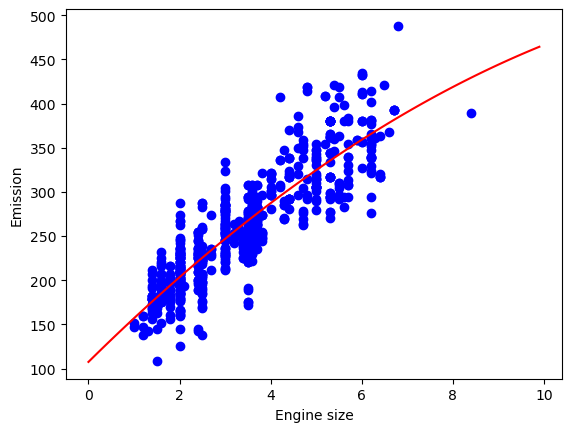

In [5]:
# Regresión Polinomial

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X = df['ENGINESIZE'] # Variable Independiente
Y = df['CO2EMISSIONS'] # Variable Dependiente
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state = 0)

# Crear el modelo de regresión polinomial
poly = PolynomialFeatures(degree=2) # Segundo Grado

# Entrenar el modelo
X_train_reshaped = X_train.values.reshape(-1, 1)
Y_train_reshaped = Y_train.values.reshape(-1, 1)
X_train_poly = poly.fit_transform(X_train_reshaped)

# Crear el modelo de regresión lineal
lineal_model = LinearRegression()

# Entrenar el modelo
lineal_model.fit(X_train_poly, Y_train_reshaped)

# Obtener los coeficientes del modelo
print ('Coefficients: ', lineal_model.coef_)
print ('Intercept: ', lineal_model.intercept_)

# Crear predicciones
Y_Pred = lineal_model.predict(X_train_poly)

# Mostrar Resultados
plt.scatter(X_train, Y_train,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
plt.plot(XX, lineal_model.intercept_[0]+ lineal_model.coef_[0][1]*XX + lineal_model.coef_[0][2]*np.power(XX, 2), color = 'red')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Evaluar el desempeño del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calcular el MSE
mse_slr = mean_squared_error(Y_test,Y_pred)
print('The MSE for your model is: ', mse_slr)

# Calcular el R-Squared
r2_test = r2_score(Y_test, Y_pred)
print("R-squared (R²) - Test data:", r2_test)

<center>
<h2> Modelos de Clasificación </h2>

La clasificación es el proceso de predecir etiquetas o categorías de clases discretas para elementos desconocidos.

### 1. Recolección de Datos

En esta sección, se obtienen un conjunto de datos sobre contiene datos sobre clientes de telecomunicaciones desde una URL utilizando la librería Pandas. Los datos se almacenan en un DataFrame para su posterior análisis y modelado.

In [7]:
import pandas as pd

# URL del conjunto de datos
url = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

# Cargar datos desde la URL
df = pd.read_csv(url)

### 2. Comprensión de los Datos
Se realizan análisis exploratorios para comprender la estructura de los datos. Esto incluye visualizar las primeras y últimas filas del DataFrame, verificar los tipos de datos y generar estadísticas descriptivas básicas.

array([[<Axes: title={'center': 'income'}>]], dtype=object)

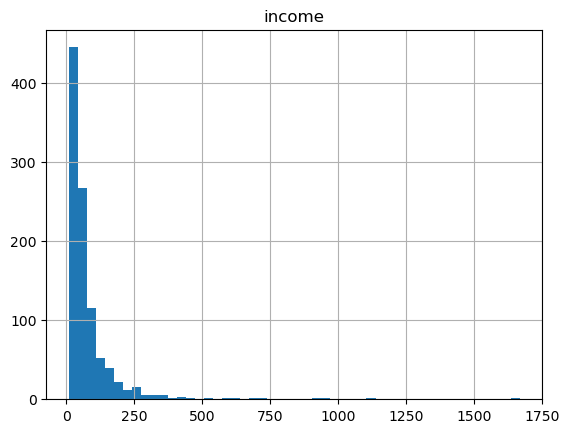

In [8]:
# Mostrar las primeras filas del DataFrame
df.head()

# Contar el número de ocurrencias de cada valor único en la columna 'custcat'
df['custcat'].value_counts()

# Generar un histograma de la columna 'income' para visualizar la distribución de los ingresos
df.hist(column='income', bins=50)

### 4. Modelado
En la fase de modelado, se aplican técnicas de clasificación para predecir posibles conjuntos de datos. A continuación se presentan algunos modelos utilizados:

#### 4.1. K-Nearest Neighbor (KNN)

KNN es un algoritmo de clasificación que toma un montón de puntos etiquetados y los utiliza para aprender cómo etiquetar otros puntos. Funciona asignando una etiqueta a un punto basándose en la mayoría de las etiquetas de sus vecinos más cercanos.

![Diagrama de KNN](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png)

Este diagrama ilustra cómo funciona el algoritmo KNN. Para un nuevo punto (punto de prueba) representado por el círculo verde, KNN encuentra los "K" puntos más cercanos (vecinos más cercanos) en el conjunto de datos de entrenamiento (puntos de entrenamiento) y asigna la etiqueta más frecuente entre esos vecinos al punto de prueba.

In [9]:
# Convertir el DataFrame a un array de Numpy
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
Y = df['custcat'].values

# Normalizar los datos
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

# Crear el modelo de KNN
from sklearn.neighbors import KNeighborsClassifier
k = 4

# Entrenar el modelo 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)

# Crear predicciones
Y_pred = neigh.predict(X_test)

# Evaluar los resultados
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)
Train set Accuracy:  0.5475
Test set Accuracy:  0.32


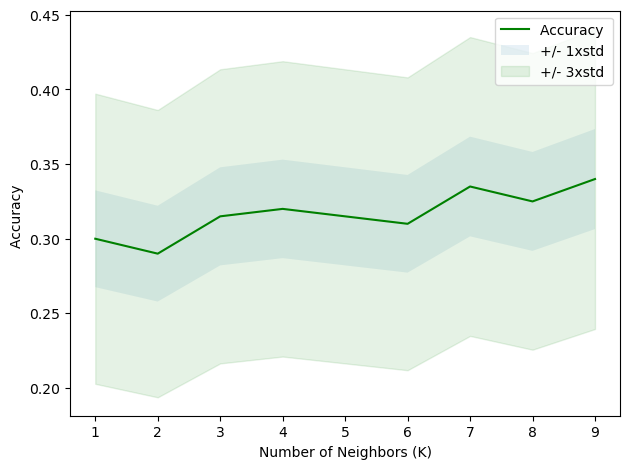

The best accuracy was with 0.34 with k= 9


In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Definir el número máximo de vecinos a probar
Ks = 10

# Inicializar arreglos para almacenar la precisión media y la desviación estándar de la precisión
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

# Iterar sobre diferentes valores de Ks
for n in range(1,Ks):
    
    # Entrenar el modelo y realizar predicciones
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    Y_pred =neigh.predict(X_test)
    
    # Calcular la precisión media para el valor de K actual
    mean_acc[n-1] = metrics.accuracy_score(Y_test, Y_pred)

    # Calcular la desviación estándar de la precisión
    std_acc[n-1]=np.std(Y_pred==Y_test)/np.sqrt(Y_pred.shape[0])

# Mostrar la precisión media para cada valor de k
mean_acc

# Graficar la precisión del modelo para diferentes números de vecinos.
plt.plot(range(1,Ks),mean_acc,'g') # Línea verde para la precisión media
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10) # Zona sombreada para +/- 1 desviación estándar
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green") # Zona sombreada para +/- 3 desviaciones estándar
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))  # Leyenda
plt.ylabel('Accuracy ') # Etiqueta del eje y
plt.xlabel('Number of Neighbors (K)') # Etiqueta del eje x
plt.tight_layout() # Ajustar el diseño de la figura
plt.show()

# Imprimir el valor de k que proporciona la mejor precisión
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

####  4.2. Decision Trees

Los árboles de decisión son un método de clasificación que utiliza un árbol de decisiones como un modelo predictivo. Cada nodo interno del árbol representa una "prueba" en una característica (por ejemplo, si una característica tiene un valor superior o inferior a un cierto umbral), cada rama representa el resultado de la prueba, y cada nodo hoja representa una etiqueta de clase. Sin embargo, este método no maneja bien las características categóricas.

![Decision_tree](https://bookdown.org/content/2031/images/decision_tree_explanation.png)

In [10]:
import pandas as pd

# 1. Recolección de datos
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")

# 2. Comprensión de los datos
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


DecisionTrees's Accuracy:  0.9833333333333333


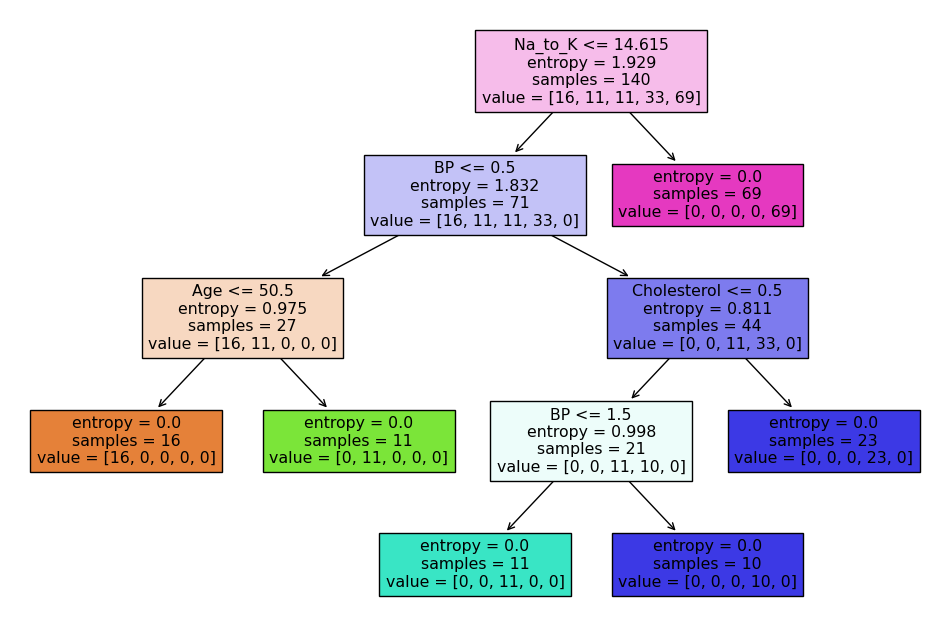

In [11]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# Crear una matriz con los datos de las características
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
Y = my_data["Drug"]

# 3. Preprocesamiento de los datos
# Convertir las características categóricas a características numéricas
# Sexo
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

# Presión Arterial
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

# Nivel de Colesterol
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 


# 4.Modelado

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Crear el modelo de árbol de decisión
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) # (drugTree) it shows the default parameters

# Entrenar el modelo
drugTree.fit(X_train,Y_train)

# Crear predicciones
predTree = drugTree.predict(X_test)

# Evaluar el modelo
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

# Visualizar el Árbol de Decisión
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(12, 8)) # Ajustar el tamaño de la figura
plot_tree(drugTree, filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
plt.savefig('tree.png') # Guardar el gráfico como un archivo de imagen# Save the plot as an image file
plt.show()

#### 4.3. Regresión Logística 
La regresión logística es un método de clasificación utilizado para predecir una variable binaria, como Sí/No o Verdadero/Falso. Además, puede predecir la probabilidad de fallos en productos o equipos.
![regresión](https://www.statdeveloper.com/wp-content/uploads/2020/02/curva-sigmoide.png)

Situaciones donde la regresión logística es útil:
* Datos binarios.
* Necesitas resultados probabilísticos.
* Necesitas una frontera de decisión lineal.
* Necesitas entender el impacto de una característica en la predicción.

In [13]:
import pandas as pd

# 1. Recolección de datos
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
df = pd.read_csv(url)

# 2. Comprensión de los datos
df.head()

# 3. Preprocesamiento de los datos
churn_df = df[['tenure', 'age', 'address','income','ed','employ','equip','callcard','wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')

C:\Users\Cristian\AppData\Local\Temp\ipykernel_10528\2370753512.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


Train set: (160, 7) (160,)
Test set: (40, 7) (40,)
[[ 6  9]
 [ 1 24]]
Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



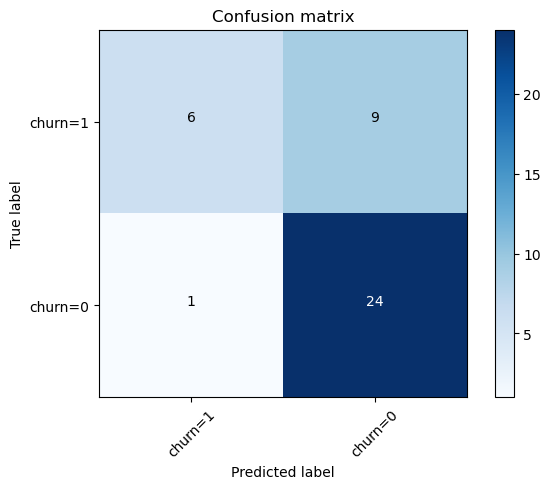

In [14]:
# Crear una matriz con los datos de las características
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
Y = np.asarray(churn_df['churn'])

# Normalizar los datos para que tengan media 0 y desviación estándar 1
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

# Crear y ajustar el modelo de regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)

# Crear predicciones
Y_pred = LR.predict(X_test)

# Crear probabilidades de predicción
Y_prob = LR.predict_proba(X_test)

# Evaluar el modelo usando el índice de Jaccard
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, Y_pred ,pos_label=0)

# Crear y mostrar la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_test, Y_pred, labels=[1,0]))

# Calcular la matriz de confusión
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
np.set_printoptions(precision=2)

# Graficar la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

# Mostrar el reporte de clasificación
print (classification_report(Y_test, Y_pred))

#### 4.4. Máquina de Soporte Vectorial  (SVM)
SVM es un algoritmo supervisado que clasifica casos encontrando un separador óptimo entre las clases. 

![SVM](https://live.staticflickr.com/65535/32848644557_b257479baa_b.jpg)

Es ampliamente utilizado en diversas aplicaciones como:

* Reconocimiento de imágenes.
* Asignación de categorías de texto.
* Detección de spam.
* Clasificación de expresión génica.
* Regresión, detección de valores atípicos y clustering.

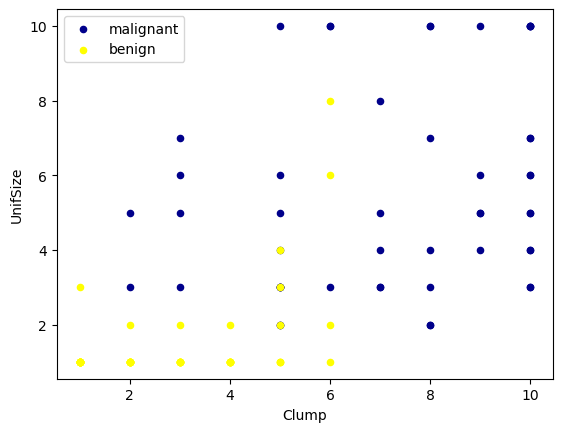

In [15]:
import pandas as pd

# 1. Recolección de datos
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv'
df = pd.read_csv(url)

# 2. Comprensión de los datos
df.head()

import matplotlib.pyplot as plt

# Crear un gráfico de dispersión para visualizar las clases de células
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');

# Filtrar las primeras 50 muestras de células benignas (Class = 2) y plotearlas en el mismo gráfico
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


0.9444444444444444

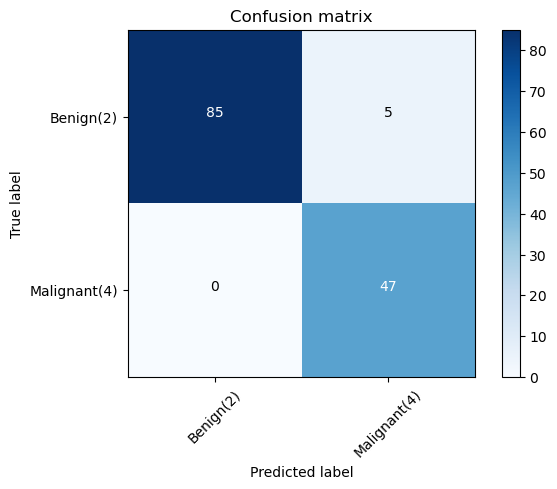

In [16]:
import numpy as np
import pandas as pd

# 3. Preprocesamiento de los datos

# Eliminate Null Values
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

# 4. Modelado

# Definir variables dependientes e independientes
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
Y = np.asarray(df['Class'])

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

# Crear el modelo SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf')

# Entrenar el modelo
clf.fit(X_train, Y_train) 

# Crear predicciones
Y_pred = clf.predict(X_test)

# Evaluación del modelo

# Definir función para graficar la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Calcular la matriz de confusión
cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[2,4])
np.set_printoptions(precision=2)

# Imprimir la matriz de confusión
print (classification_report(Y_test, Y_pred))

# Graficar la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

# Calcular y mostrar el F1-Score
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='weighted') 

# Calcular y mostrar el índice de Jaccard
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, Y_pred,pos_label=2)

<center>
<h1>Unsupervised Learning Techniques</h1>

<center>
<h2> Modelos de Clustering </h2>
</center>

El clustering es la agrupación de puntos de datos u objetos que son de alguna manera similares entre sí mediante:
* Descubrimiento de estructuras.
* Resumen de datos.
* Detección de anomalías.
* Encontrar duplicados.
* Paso de preprocesamiento.

El clustering puede agrupar datos únicamente de manera "no supervisada" basándose en la similitud de los objetos entre sí.

####  K-Means Clustering

K-means es un algoritmo de clustering que particiona los datos en *k* grupos (clusters) basándose en sus características. El algoritmo asigna cada punto de datos al cluster más cercano y minimiza la variación dentro de cada cluster.


![Diagrama de KNN](https://miro.medium.com/v2/resize:fit:1200/1*rw8IUza1dbffBhiA4i0GNQ.png)

#### Aplicaciones del mundo real de k-means:
- Segmentación de clientes
- Entender qué están intentando lograr los visitantes de un sitio web
- Reconocimiento de patrones
- Aprendizaje automático
- Compresión de datos



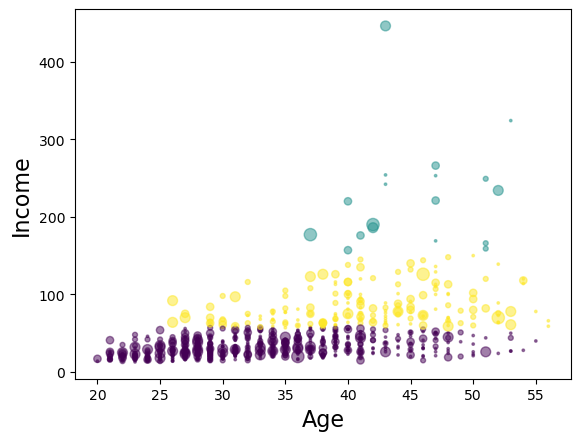

In [17]:
import pandas as pd

# 1. Recolección de datos
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")

# 2. Comprensión de los datos
df.head()

# 3. Preprocesamiento de los datos
df = df.drop('Address', axis=1)

# Normalization utilizando la desviación estándar
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
X_norm = StandardScaler().fit_transform(X)

# 4. Modelado
from sklearn.cluster import KMeans 
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

# Insight
df["Clus_km"] = labels
df.head(5)

df.groupby('Clus_km').mean()

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)

plt.show()

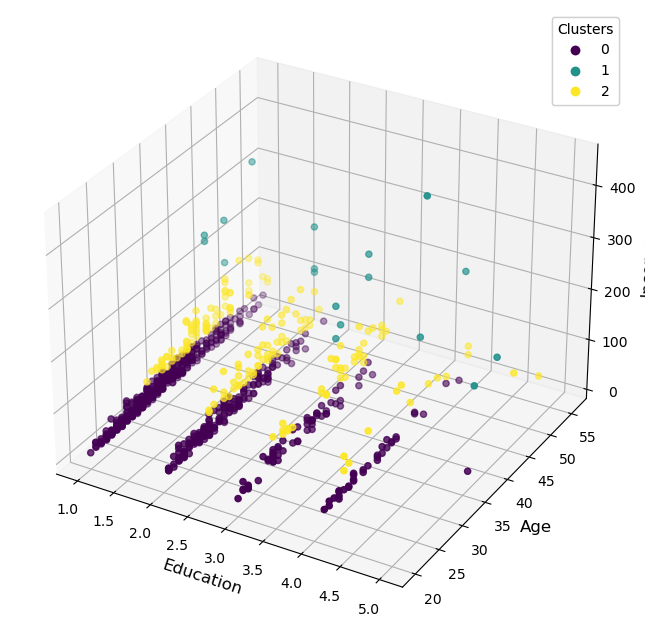

In [18]:
# Mostrar 3D plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear figura y ejes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir ejes y etiquetas
ax.set_xlabel('Education', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_zlabel('Income', fontsize=12)

# Scatter plot en 3D con colores por clusters
scatter = ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(np.float64))

# Ajustar tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=10)

# Añadir una leyenda para los colores
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Mostrar el gráfico
plt.show()

#### DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering que agrupa puntos de datos en clusters basándose en la densidad de los puntos en el espacio. A diferencia de otros algoritmos de clustering que requieren especificar el número de clusters de antemano, DBSCAN puede descubrir automáticamente el número óptimo de clusters en los datos.

DBSCAN define puntos como:
- Puntos centrales: Puntos que tienen al menos un número mínimo de puntos dentro de un radio especificado (MinPts).
- Puntos frontera: Puntos que están dentro del radio especificado de un punto central pero no tienen suficientes vecinos para ser considerados como centrales.
- Puntos de ruido: Puntos que no son centrales ni frontera.

![DBSCAN](https://machinelearninggeek.com/wp-content/uploads/2020/10/image-58.png)

Ventajas de DBSCAN:
- Robusto frente a ruido y capaz de identificar outliers.
- No requiere especificar el número de clusters de antemano.
- Capaz de encontrar clusters de formas arbitrarias.

Desventajas de DBSCAN:
- Sensible a la elección de parámetros como MinPts y el radio epsilon.
- Puede ser computacionalmente costoso en conjuntos de datos de alta dimensionalidad o con una gran cantidad de puntos.

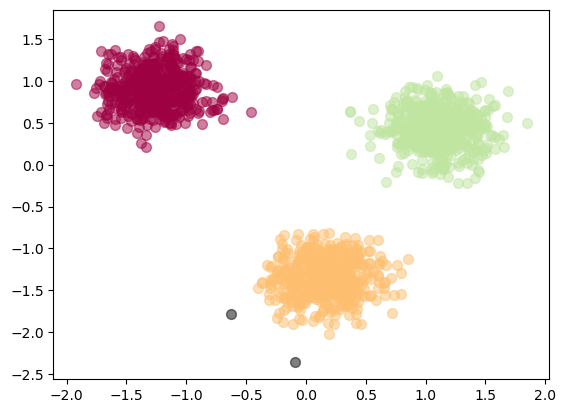

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# 1. Recolección de datos
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Crear datos aleatorios y almacenarlos en la matriz de características X y el vector de respuesta y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # 3. Preprocesamiento de los datos
    # Estandarizar características al eliminar la media y escalar a la varianza unitaria
    X = StandardScaler().fit_transform(X)
    return X, y

X, Y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

# 4. Modelado
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_

# Primero, crear una matriz de booleanos usando las etiquetas de db
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Número de clusters en las etiquetas, ignorando el ruido si está presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Eliminar la repetición en las etiquetas convirtiéndolas en un conjunto.
unique_labels = set(labels)

# Crear colores para los clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Graficar los puntos con colores
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Negro usado para el ruido.
        col = 'k'

    class_member_mask = (labels == k)

    # Graficar los puntos de datos que están agrupados
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Graficar los valores atípicos
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

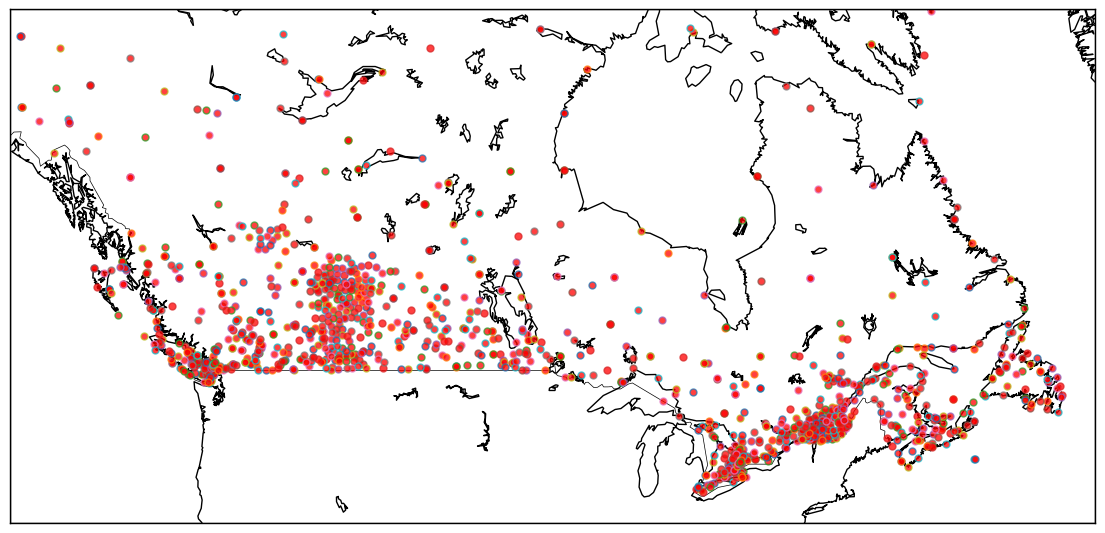

In [22]:
import pandas as pd
import numpy as np

# 1. Recolección de datos
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv'
df = pd.read_csv(url)

# 3. Preprocesamiento de los datos
df = df[pd.notnull(df["Tm"])]
df = df.reset_index(drop=True)

# Configuración de visualización
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

# Definir límites geográficos
llon=-140
ulon=-50
llat=40
ulat=65

# Filtrar estaciones dentro de los límites geográficos
df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) &(df['Lat'] < ulat)]

# Crear el mapa
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) y latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) y latitude (urcrnrlat)

# Dibujar elementos del mapa
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

       
# Convertir coordenadas a proyección del mapa
xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
df['xm']= xs.tolist()
df['ym'] =ys.tolist()

# Visualización de las estaciones meteorológicas en el mapa
for index,row in df.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

Cluster 0, Avg Temp: -5.538747553816046
Cluster 1, Avg Temp: 1.9526315789473685
Cluster 2, Avg Temp: -9.195652173913045
Cluster 3, Avg Temp: -15.300833333333333
Cluster 4, Avg Temp: -7.769047619047619


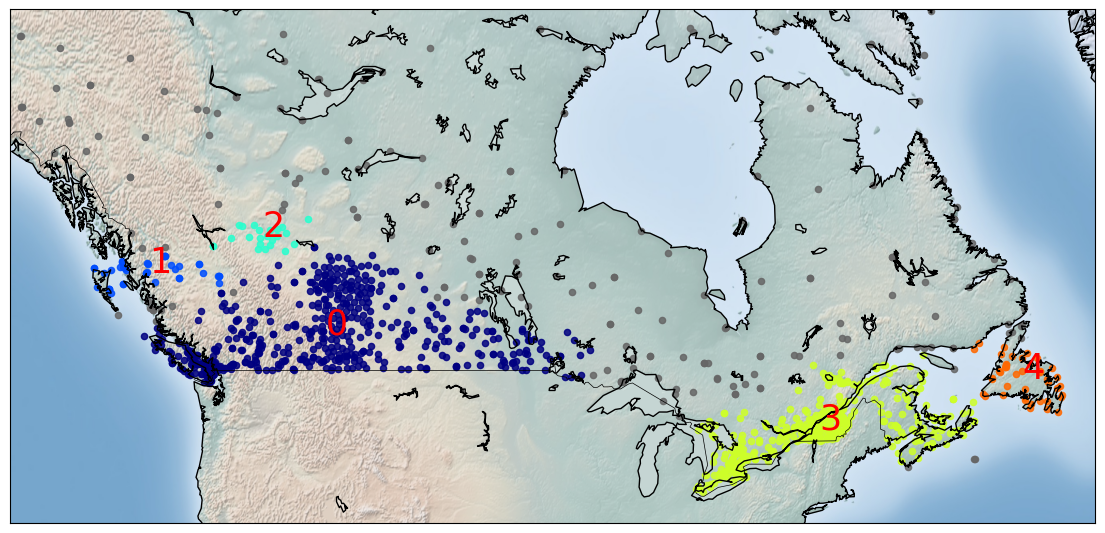

In [25]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Establecer la semilla aleatoria para reproducibilidad
sklearn.utils.check_random_state(1000)

# Seleccionar los datos de las estaciones meteorológicas a utilizar
Clus_dataSet = df[['xm','ym']]

# Lidiar con los valores nulos y normalizar los datos
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Calcular el agrupamiento con DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)

# Identificar los puntos centrales según el algoritmo DBSCAN
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Obtener las etiquetas de los clústeres asignados por DBSCAN
labels = db.labels_

# Agregar las etiquetas de clústeres al DataFrame original
df["Clus_Db"]=labels

# Calcular el número real de clústeres y el número total de clústeres
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# Visualización del mapa utilizando Basemap
rcParams['figure.figsize'] = (14,10)
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# Generar colores para los diferentes clústeres
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

# Visualización de los clústeres en el mapa
for clust_number in set(labels):
    # Asignar colores a los puntos según su clúster
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int64(clust_number)])
    clust_set = df[df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    # Mostrar el número del clúster y la temperatura promedio si no es ruido
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym)
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))
        
plt.show()

Cluster 0, Avg Temp: 6.221192052980132
Cluster 1, Avg Temp: 6.790000000000001
Cluster 2, Avg Temp: -0.49411764705882344
Cluster 3, Avg Temp: -13.87720930232558
Cluster 4, Avg Temp: -4.186274509803922
Cluster 5, Avg Temp: -16.301503759398496
Cluster 6, Avg Temp: -13.599999999999998
Cluster 7, Avg Temp: -9.753333333333334
Cluster 8, Avg Temp: -4.258333333333334


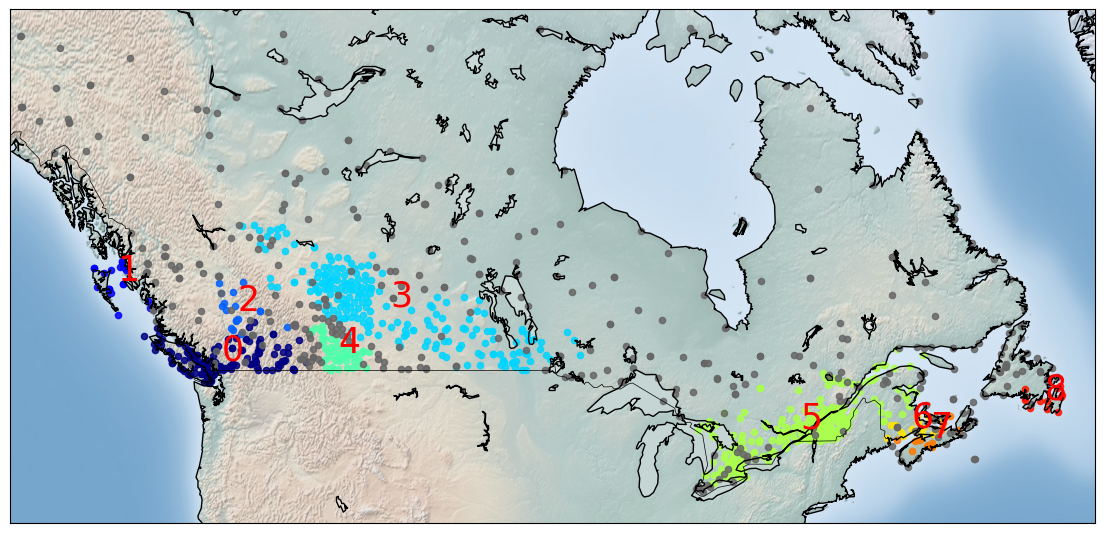

In [26]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

# Establecer la semilla aleatoria para reproducibilidad
sklearn.utils.check_random_state(1000)

# Seleccionar los datos de las estaciones meteorológicas a utilizar, incluyendo ubicación y temperaturas
Clus_dataSet = df[['xm','ym','Tx','Tm','Tn']]

# Lidiar con los valores nulos y normalizar los datos
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Calcular el agrupamiento con DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Clus_Db"]=labels

# Calcular el número real de clústeres y el número total de clústeres
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# Mostrar una muestra de los clústeres asignados
df[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

# Visualización en el mapa utilizando Basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# Generar colores para los diferentes clústeres
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

# Visualización de los clústeres en el mapa
for clust_number in set(labels):
    # Asignar colores a los puntos según su clúster
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int64(clust_number)])
    clust_set = df[df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    # Mostrar el número del clúster y la temperatura promedio si no es ruido
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))